In [1]:
import pandas

edges = pandas.read_csv('community.csv')
print(f'{len(edges.follower.unique())} nodes with {len(edges)} edges')
edges.head()

46815 nodes with 70711 edges


,follower,followed
0,1087614352021221376,1094637744754704384
1,1233481543789793282,1094637744754704384
2,1230240450184957955,1094637744754704384
3,1094658142988849154,1094637744754704384
4,15727047,1094637744754704384


In [2]:
id_to_login = {
    1094637744754704384: 'Grenoble_Commun',
    1179020855323615233: 'GrenobleNvAir',
    1185172762287132672: 'Chalas2020',
    1222415322269044741: 'CommuneEstANous',
    722010413672636416: 'CarignonAlain',
    101776273: 'onoblecourt',
    1436327000: 'EmilieCChalas',
    1137353412: 'EricPiolle'
}
users = {
    'EricPiolle': 'Grenoble en Commun',
    'Grenoble_Commun': 'Grenoble en Commun',
    'EmilieCChalas': 'Un Nouveau Regard sur Grenoble',
    'Chalas2020': 'Un Nouveau Regard sur Grenoble',
    'CarignonAlain': 'Grenoble le Changement',
    'onoblecourt': 'Grenoble Nouvel Air',
    'GrenobleNvAir': 'Grenoble Nouvel Air',
    'CommuneEstANous': 'La commune est à nous !',
}
names = {
    'EricPiolle': 'Éric Piolle',
    'EmilieCChalas': 'Emilie Chalas',
    'CarignonAlain': 'Alain Carignon',
    'onoblecourt': 'Olivier Noblecourt',
    'Grenoble_Commun': 'Grenoble en Commun',
    'Chalas2020': 'Un Nouveau Regard sur Grenoble',
    'GrenobleNvAir': 'Grenoble Nouvel Air',
    'CommuneEstANous': 'La commune est à nous !',
}
colors = {
    'Grenoble en Commun': '#00c000',
    'Un Nouveau Regard sur Grenoble': '#ffb400',
    'Grenoble le Changement': '#0066CC',
    'Grenoble Nouvel Air': '#ff8080',
    'La commune est à nous !': '#bb0000'
}
color2 = {usr_id: colors[users[login]] for usr_id, login in id_to_login.items()}
color2

{1094637744754704384: '#00c000',
 1179020855323615233: '#ff8080',
 1185172762287132672: '#ffb400',
 1222415322269044741: '#bb0000',
 722010413672636416: '#0066CC',
 101776273: '#ff8080',
 1436327000: '#ffb400',
 1137353412: '#00c000'}

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
G.add_edges_from([e for _, e in edges.iterrows()])
print(f'{len(G)} nodes with {len(G.edges)} edges')

50566 nodes with 70711 edges


In [4]:
mutuals = G.to_undirected(reciprocal=True)
print(f'{len(mutuals)} nodes with {len(mutuals.edges)} edges')

50566 nodes with 5321 edges


In [5]:
def trim_degrees(g, degree=1):
    g = g.copy()
    low_degrees = [node for node, deg in g.degree() if deg < degree]
    print(f'Removing {len(low_degrees)} nodes')
    g.remove_nodes_from(low_degrees)
    return g

In [6]:
pruned = trim_degrees(trim_degrees(mutuals, degree=3), degree=1)
print(f'{len(pruned)} nodes with {len(pruned.edges)} edges')

Removing 50360 nodes
Removing 2 nodes
204 nodes with 633 edges


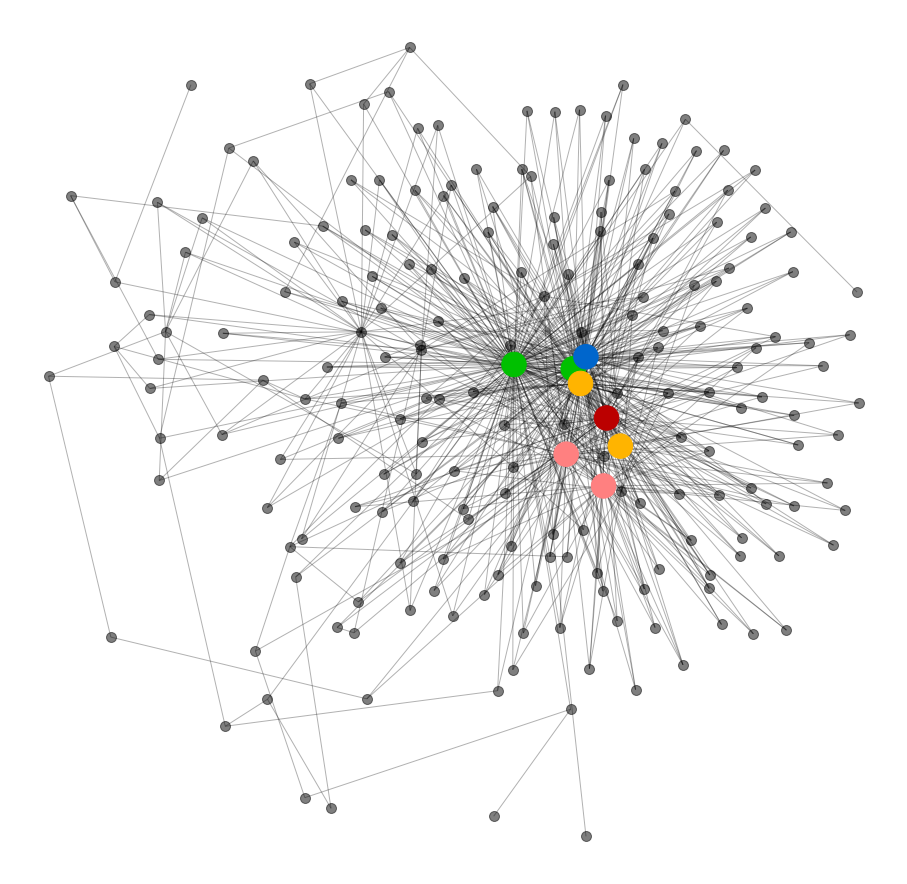

In [7]:
pos = nx.spring_layout(pruned, k=0.5, iterations=50)  # compute graph layout
plt.figure(figsize=(16, 16))
plt.axis('off')
main_nodes = list(id_to_login)
main_colors = list(color2[node] for node in main_nodes)
nx.draw_networkx_nodes(main_nodes, pos, node_size=600, node_color=main_colors)
nx.draw_networkx_nodes(set(pruned)-set(main_nodes), pos, node_size=100, alpha=0.5, node_color='black')#, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(pruned, pos, alpha=0.3)
plt.show(pruned)